<a href="https://colab.research.google.com/github/yaelnoyman1/Detecting-defects-in-fruits/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruits classification
In this project i will make a model to predict 131 kinds of fruits, with a CNN classification model based on deep learning.

My goal is to reach the maximum accuracy to be able to identify fruits as good as we can.

Dataset:https://www.kaggle.com/datasets/moltean/fruits

#Download the Dataset using Kaggle API

first of all, i am dounloading the dataset using the Kaggle API with the kaggle.json we make

instraction of using the API:

https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/

In [ ]:
!pip install opendatasets

In [ ]:
!pip install pandas


after generate the kaggle.json token i using it for username and the key.

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds

In [ ]:
import opendatasets as od
import pandas

od.download('https://www.kaggle.com/datasets/moltean/fruits')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yaelnoyman
Your Kaggle Key: ··········


100%|██████████| 1.28G/1.28G [00:12<00:00, 115MB/s]


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import torch
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from tqdm.notebook import tqdm
import torchvision.transforms as T
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import save_image
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
!pip install colorama

In [ ]:
import random
from colorama import Fore, Back, Style

# Load the Dataset
I am using the 'Fruits 360' dataset from kaggle.  


In [ ]:
data_dir = '/content/fruits/fruits-360_dataset/fruits-360'

## createing the classes names list
The dataset is devieded to Test and Training Folders.

In [ ]:
classes = os.listdir(data_dir + "/Training")

## count the image of each class
- there is 131 kinds of fruites

In [ ]:
train_image_count = {}
for item in classes:
    train_image_count[item] = 0

In [ ]:
for i, item in enumerate(classes):
    train_image_count[item] = len( os.listdir(data_dir + "/Training/"+item))

In [ ]:
for i, key  in enumerate(train_image_count):
    if i == 10: break
    print(f'fruit name = {key} , number is = {train_image_count[key]}')

fruit name = Kiwi , number is = 466
fruit name = Strawberry , number is = 492
fruit name = Apple Red 3 , number is = 429
fruit name = Cherry 2 , number is = 738
fruit name = Pepino , number is = 490
fruit name = Plum 2 , number is = 420
fruit name = Peach Flat , number is = 492
fruit name = Tangelo , number is = 490
fruit name = Melon Piel de Sapo , number is = 738
fruit name = Mangostan , number is = 300


In [ ]:
num_classes=len(classes)
num_classes

131

### Distribution of the size s for etch class
- as we can see the distribution is not so different
and the sizes are pretty much the same, except of some minor calsses that has more large training data

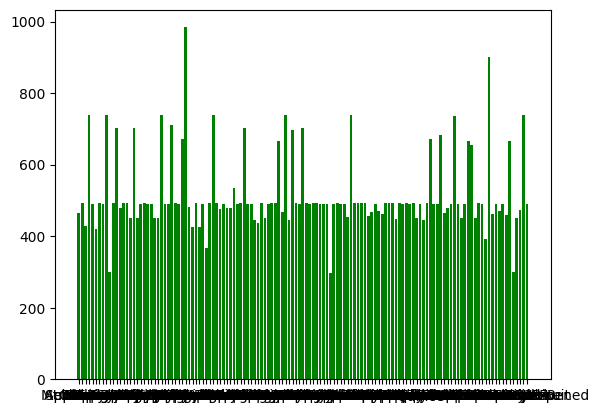

In [ ]:
plt.bar(list(train_image_count.keys()), train_image_count.values(), color='g')
plt.show()

###  Load the dataset and convert them into pytorch Tensors

each image is in format [0-1]

In [ ]:
dataset = ImageFolder(data_dir+'/Training', transform=ToTensor())

In [ ]:
test_dataset = ImageFolder(data_dir+'/Test',transform=ToTensor())

In [ ]:
dataset[0]

(tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    plt.title(dataset.classes[label])
    print(img.shape)

Label:  Apple Braeburn (0)
torch.Size([3, 100, 100])


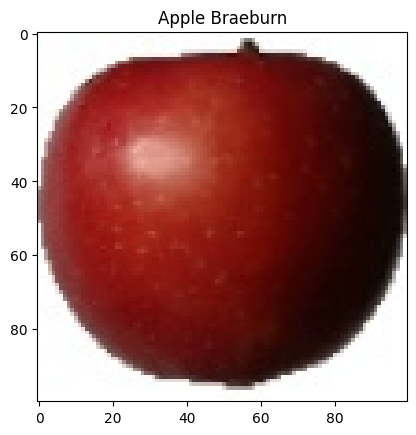

In [ ]:
show_example(*dataset[1])

## Split our dataset to train and validation sets

I take 80% of the data to train and 20% for the validation

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
val_pct = 0.2
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(54154, 13538)

In [ ]:
batch_size=128

##### loding the datasets to dataloader object

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
test_dl = DataLoader(test_dataset,batch_size*2,num_workers = 2,pin_memory=True)

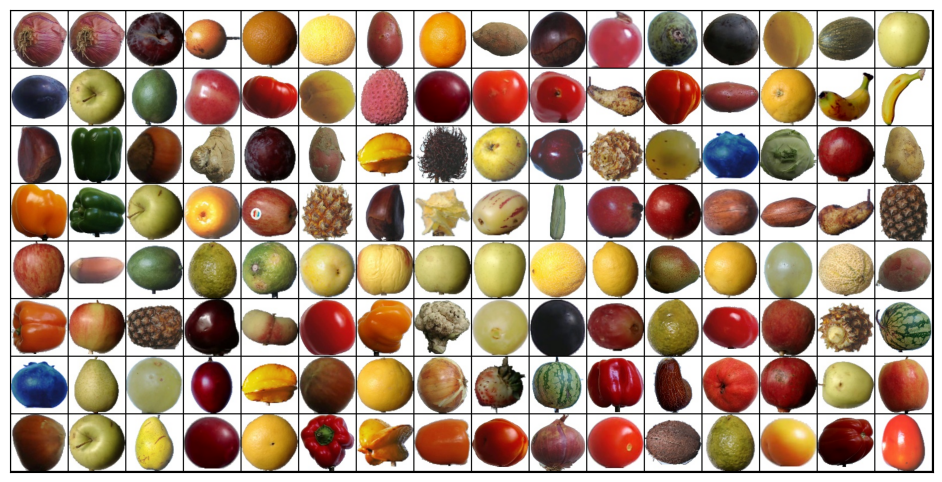

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
show_batch(train_dl)

# Create the model

I will create a CNN model for the classification problem.

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

#### The model

In [ ]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 25 x 25

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(5, 5), # output: 256 x 5 x 5

            nn.Flatten(),
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes))

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = CnnModel()
model

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=10

The expected resutls are a tensor in shape (BATCH_SIZE, CLASSES_LEN)
for each image its gives us a list of probabilities for each 131 classes.

the class with the highest probability is the chosen class.

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 131])
out[0]: tensor([-3.9091e-02,  5.7532e-02,  2.9646e-02,  3.8123e-02,  3.9940e-02,
        -1.3074e-02, -1.9570e-02, -5.2701e-02, -5.9025e-03, -1.3950e-02,
        -1.1848e-02, -3.9941e-02, -6.5861e-02, -3.1672e-03, -5.3569e-03,
        -2.0467e-03,  1.0477e-02, -6.8153e-03,  3.3870e-02, -1.6040e-02,
        -4.5104e-02,  7.3358e-03,  1.2455e-02, -4.2911e-02,  2.9425e-02,
        -1.1983e-02,  2.2844e-02,  6.1007e-02,  4.5854e-02, -5.5463e-02,
         3.6140e-02,  9.1680e-03,  1.4607e-02, -2.1014e-02, -5.4219e-02,
         1.8672e-02, -7.0418e-03,  2.2954e-02, -1.2486e-03, -4.1087e-02,
        -3.4500e-02,  4.4289e-02, -3.5771e-02,  4.4952e-02,  1.0796e-03,
         1.8260e-02, -8.0366e-03,  4.9190e-02,  5.0883e-02,  8.1148e-03,
        -3.2534e-02, -7.8074e-03,  1.1890e-02, -2.9827e-02,  4.3589e-02,
         7.4407e-02, -3.5425e-02, -3.3213e-02,  4.9429e-02,  3.2863e-02,
         6.3768e-02,  3.5233e-02,  2.

### let's chouse to run with: CPU or GPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        print(Fore.GREEN + "GPU found")
        return torch.device('cuda')
    else:
        print(Fore.RED + "no GPU founded, using CPU")
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

GPU found


device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl,device)
to_device(model, device);

## Training the CNN Model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before the training, let's evaluate the model and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(CnnModel(), device)
evaluate(model, val_dl)

{'val_loss': 4.874369144439697, 'val_acc': 0.008210364729166031}

As you can see the initial accuracy is vary low, which is what we expectes from not trained model with random inputs.

## Training

#### Hyper parameters for the model training

In [ ]:
num_epochs = 6
opt_func = torch.optim.Adam
lr = 0.001

let's train it for 6 epoches

In [ ]:
%%time
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [0], train_loss: 2.0689, val_loss: 0.6472, val_acc: 0.7769


  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.2660, val_loss: 0.1663, val_acc: 0.9407


  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.1158, val_loss: 0.0688, val_acc: 0.9768


  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0668, val_loss: 0.6106, val_acc: 0.8493


  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0709, val_loss: 0.0536, val_acc: 0.9832


  0%|          | 0/424 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0401, val_loss: 0.0131, val_acc: 0.9959
CPU times: user 4min 20s, sys: 4min 8s, total: 8min 29s
Wall time: 9min 50s


### Evaluating the model on the test dataset after the training

In [ ]:
evaluate(model, test_dl)

{'val_loss': 0.4901103377342224, 'val_acc': 0.9087780714035034}

we can see thet we reached, to a 90% of accuracy after only 6 epoches, that is a vary good results.
but let's predict some pictures first

##Ploting the results of the loss and accuracy resutls

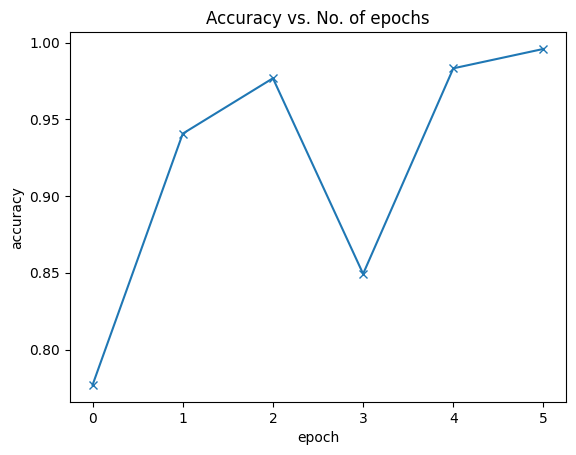

In [ ]:
def plot_accuracy(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
plot_accuracy(history)

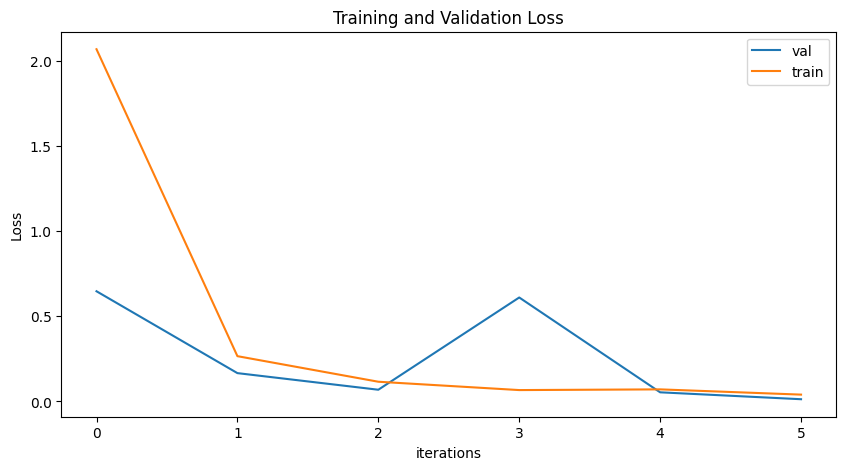

In [ ]:
def plot_loss_graph(_history):
  val_losses = []
  train_losses = []
  train_losses.extend([info['train_loss'] for info in _history])
  val_losses.extend([info['val_loss'] for info in _history])

  plt.figure(figsize=(10,5))
  plt.title("Training and Validation Loss")
  plt.plot(val_losses,label="val")
  plt.plot(train_losses,label="train")
  plt.xlabel("iterations")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
plot_loss_graph(history)

#prediction

Les't take some random image from the test directory and predict its class

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
test_length = len(test_dataset)
test_length

22688

## check on random choice


let's chose 9 random images from test dataset and predict its label

In [ ]:
rand_prediction = []
for _ in range(9):
  rand_img, rand_label = random.choice(test_dataset)
  data_label = dataset.classes[rand_label]
  predict_label = predict_image(rand_img, model)
  rand_prediction.append((rand_img, predict_label, data_label))

now we plot the predidion and if the prediction was right

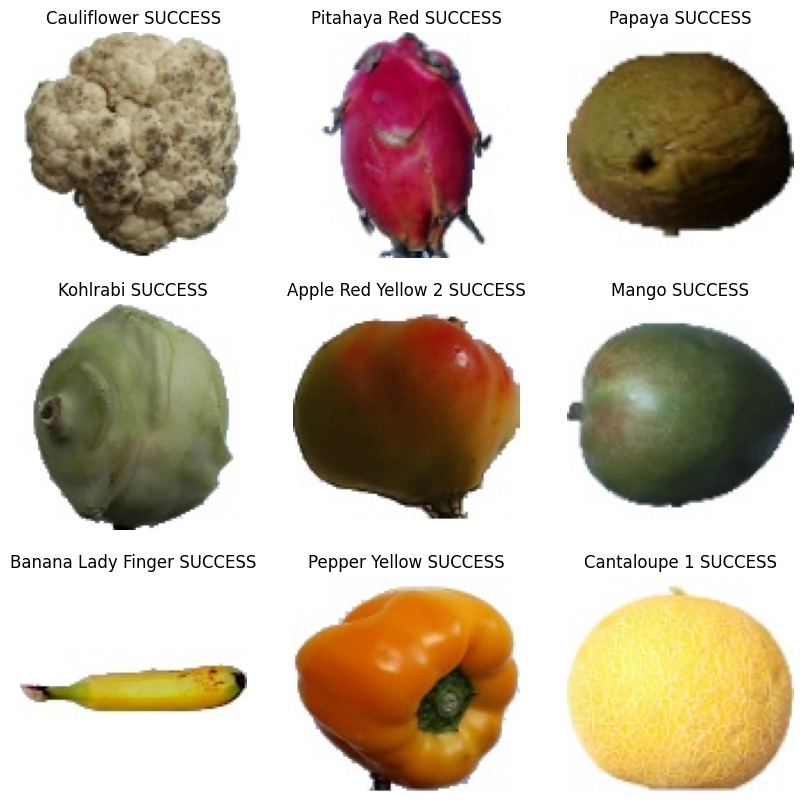

In [ ]:
status = ''
plt.figure(figsize=(10, 10))
for i, (img, prediction, lablel) in enumerate(rand_prediction):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.permute(1, 2, 0))
  status = 'SUCCESS' if prediction == lablel else 'FAILED'
  plt.title(f'{prediction} {status}')
  plt.axis("off")

predict a singel image

In [ ]:
def random_choice(_dataset, _model):
  rand_img, rand_label = random.choice(_dataset)
  plt.imshow(rand_img.permute(1, 2, 0))
  data_label = dataset.classes[rand_label]
  predict_label = predict_image(rand_img, _model)
  print('Label:', data_label, ', Predicted:', predict_label)
  if data_label == predict_label:
    print(Fore.GREEN + "SUCCESS")
  else:
    print(Fore.RED + "FAIL")

Label: Quince , Predicted: Quince
SUCCESS


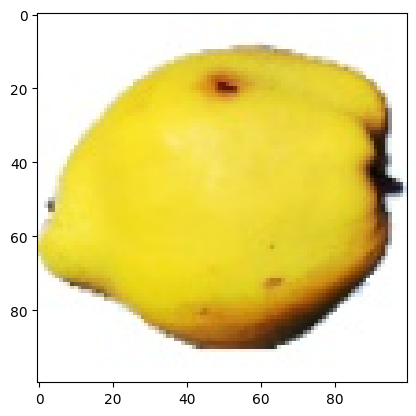

In [ ]:
random_choice(test_dataset, model)

# Save the model

In [ ]:
torch.save(model, 'fruit_detection.hdf5')